In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:86% !important;}
div.cell.code_cell.rendered{width:100%;}
div.CodeMirror {font-family:Consolas; font-size:15pt;}
div.output {font-size:15pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:15pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:15px;}
</style>
"""))

<font size="5" color="red">ch10. N차원 배열 다루기</font>
- [numpy](https://numpy.org/doc/stable/)
- [numpy API](https://numpy.org/doc/stable/reference/index.html)
- N차원 배열 객체
- 2차원 배열은 행렬개념
- numpy 패키지는 C언어로 구현되어 고성능 수치 계산 패키지
# 1절 Numpy 패키지

In [1]:
import numpy as np
np.__version__

'1.23.5'

In [10]:
# np.arange(from, stop, step) : from 부터 stop 앞까지 step씩 증감한 정수값을 배열로 생성
a = np.arange(15)

## 1.1 배열 속성

In [2]:
from numpy import arange
a = arange(15).reshape(3, 5) # 3행 5열짜리 2차원 배열로 return
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [35]:
type(a) # a변수의 타입
type(a.dtype) # a배열 요소의 type

numpy.dtype[int32]

In [36]:
a.dtype.name

'int32'

In [37]:
a.itemsize # 한 요소의 bytesize

4

In [38]:
a.ndim #차원수 축수

2

In [39]:
a.size # 배열 요소의 개수

15

In [40]:
a.shape # 배열의 구조 (튜플)

(3, 5)

## 1.2 배열 변경(구조, 타입)

In [90]:
# 구조 변경
print('구조변경 전', a, sep='\n')
a.shape = (5, 3)
print('구조변경 후', a, sep='\n')

구조변경 전
[[2 2 2 3]
 [4 3 2 1]]


ValueError: cannot reshape array of size 8 into shape (5,3)

In [91]:
# 타입 변경(X)
a = arange(12).reshape(3, 4)
a

NameError: name 'arange' is not defined

In [92]:
a.dtype

dtype('int32')

In [93]:
a.itemsize

4

In [94]:
a.size

8

In [95]:
a.shape

(2, 4)

In [96]:
a.dtype = np.int64 # a배열을 읽을 때 64bit씩 읽는다
a.dtype

dtype('int64')

In [97]:
a.itemsize

8

In [98]:
a.size

4

In [99]:
a.shape

(2, 2)

In [100]:
a

array([[ 8589934594, 12884901890],
       [12884901892,  4294967298]], dtype=int64)

In [6]:
# 타입변경(O)
a = arange(12).reshape(3,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [7]:
a = a.astype(np.int64) # 할당하지 않으면 a 변경 X

NameError: name 'np' is not defined

In [ ]:
a.astype('int64')

In [8]:
a.dtype

dtype('int32')

In [9]:
a.itemsize

4

In [10]:
a.size, a.shape

(12, (3, 4))

In [11]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [12]:
a.flatten()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [13]:
a.ravel()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [14]:
a.size, a.shape

(12, (3, 4))

## 1.3 배열 저장

In [15]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [16]:
import pickle
with open('data/ch10_a.pkl', 'wb') as f :
    pickle.dump(a, f)


In [17]:
with open('data/ch10_a.pkl', 'rb') as f :
    load_a = pickle.load(f)

In [18]:
load_a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [22]:
np.all(a == load_a) # a numpy 배열과 load_a numpy 배열 같은지

True

In [124]:
np.save('data/ch10_a.npy', a)

In [ ]:
load_a2 = np.load('data/ch10_a.npy')
np.all(load_a2==a)

# 2절. numpy 배열
- array()함수 : 다른 파이썬 데이터 구조를 배열로 변환
- arange(), ones(), zeros(), empty()
- 랜덤값을 갖는 함수들...
## 2.1 array() 함수로 numpy 배열 만들기
- array(리스트나 튜플, dtype=np.xxx, copy=T/F)

In [25]:
a = np.array(['2', 4, 6], dtype=np.int8) # 정수의 기본 타입은 int 32 / 실수의 기본 타입은 float64
a

array([2, 4, 6], dtype=int8)

In [27]:
a[0], a[1], a[2]

(2, 4, 6)

In [28]:
a.dtype

dtype('int8')

In [29]:
b = np.array([[1.3,2.4], 
          [4,5]])
b

array([[1.3, 2.4],
       [4. , 5. ]])

In [30]:
b.dtype

dtype('float64')

In [31]:
b = np.array([[1.3,2.4],[4,5]], dtype=np.float32).reshape(1, 4)

In [153]:
b

array([[1.3, 2.4, 4. , 5. ]], dtype=float32)

In [32]:
b.itemsize

4

In [33]:
b.astype(np.float64)

array([[1.29999995, 2.4000001 , 4.        , 5.        ]])

In [34]:
l = [[1,2], [3.4, 4.5]]
for row in l :
    for data in row :
        print(data, end='\t')
    print()

1	2	
3.4	4.5	


In [35]:
c = np.array([[1,2], [3.4, 4.5]], dtype=np.float64)  # float16 보다 float 64가 정확하다.
for i, row in enumerate(c):
    for j, item in enumerate(row):
        print("{}행{}열:{}".format(i,j,item), end='\t')
    print()

0행0열:1.0	0행1열:2.0	
1행0열:3.4	1행1열:4.5	


In [178]:
c = np.array([[1,2,3,4,5],[6,7,8,9,10]], dtype=np.int16)
c

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10]], dtype=int16)

In [180]:
c[1,]

array([ 6,  7,  8,  9, 10], dtype=int16)

In [181]:
print(c[:, 1:3]) # 모든행, 1열부터 3열 앞까지
print(c[0:1, 2::]) # 0행 2~4열까지

[[2 3]
 [7 8]]
[[3 4 5]]


In [192]:
# 모든행의 맨 마지막 열만 추출
c[:, -1::]

array([[ 5],
       [10]], dtype=int16)

In [194]:
# 모든행의 맨 마지막 열을 제외한 추출
c[:,:-1]

array([[1, 2, 3, 4],
       [6, 7, 8, 9]], dtype=int16)

In [198]:
c = np.array([[1,2], [3,4]])
d = np.array(c, copy=False) # c=d 얕은복사
print('c=', c, sep='\n')
print('d=', d, sep='\n')
d[1, 0] = 3333
print('c=', c, sep='\n')
print('d=', d, sep='\n')
print('c주소 ={}, d주소:{}'.format(id(c), id(d)))

c=
[[1 2]
 [3 4]]
d=
[[1 2]
 [3 4]]
c=
[[   1    2]
 [3333    4]]
d=
[[   1    2]
 [3333    4]]


In [36]:
c = np.array([[1,2], [3,4]])
d = np.array(c, copy=True) # d=c.copy() 깊은복사
print('c=', c, sep='\n')
print('d=', d, sep='\n')
d[1, 0] = 3333
print('c=', c, sep='\n')
print('d=', d, sep='\n')
print('c주소 ={}, d주소:{}'.format(id(c), id(d)))

c=
[[1 2]
 [3 4]]
d=
[[1 2]
 [3 4]]
c=
[[1 2]
 [3 4]]
d=
[[   1    2]
 [3333    4]]
c주소 =2140170038480, d주소:2140170037616


## 2.2 기본값이 있는 배열 만들기
- np.zeors( tup ) : 요소들이 다 0
- np.ones( tup ) : 요소들이 다 1
- np.full( tup ) : 요소들이 다 기본값
- np.empty(tup) : 기본값이 임의의 값(메모리 상태에 따라 달라짐)
※ 위의 함수를 이용한 배열의 dtype = float64. dtype 속성따라 지정가능

In [37]:
np.zeros( (3, 5), dtype=np.int8)

array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]], dtype=int8)

In [39]:
x = np.ones((3, 5))
x.dtype, x

(dtype('float64'),
 array([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]]))

In [40]:
np.full( (2,5), -256)

array([[-256, -256, -256, -256, -256],
       [-256, -256, -256, -256, -256]])

## 2.3 랜덤값을 갖는 배열 만들기
import numpy as np
- np.random.random(tup) : 0부터 1 미만의 균등분포를 갖는 랜덤값
- np.random.uniform(low=0, high=1.0, size=tup) : low부터 high미만의 균등분포를 갖는 랜덤값
- np.random.normal(loc=0, scale=1.0, size=tup) : 평균 loc과 표준편차scale을 갖는 정규분포 랜덤값
- np.random.rand(n) : 균등분포의 1차원 난수 배열 발생(난수 n개)
- np.random.randn(n) : 표준정규분포(평균0, 표준편차1인 정규분포)의 1차원 난수 배열 발생 (난수 n개)

*np.random.randint(n) : 0부터 n미만의 정수 난수 1개 발생

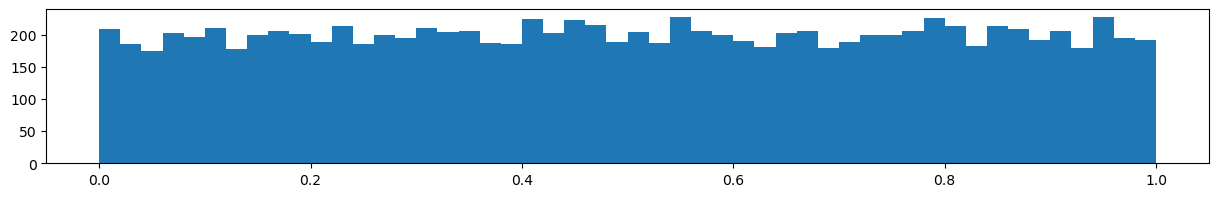

In [211]:
import matplotlib.pyplot as plt
x = np.random.rand(10000)
plt.figure(figsize=(15,2)) # 그래프 크기 figsize=(가로, 세로)
plt.hist(x, bins=50)
plt.show()

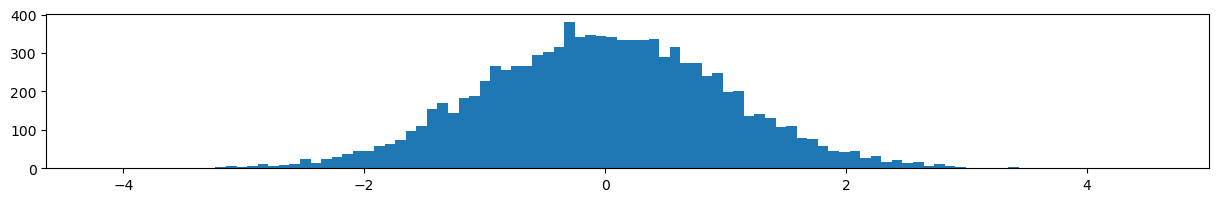

In [212]:
x = np.random.randn(10000)
plt.figure(figsize=(15, 2)) # 그래프 크기 figsize=(가로, 세로)
plt.hist(x, bins=100)
plt.show()

In [213]:
# 2차원 난수 배열
np.random.seed(12) # seed 값을 맞추면 발생되는 난수 순서가 동일
np.random.random( (2, 5) ) # 0부터 1미만 난수 배열

array([[0.15416284, 0.7400497 , 0.26331502, 0.53373939, 0.01457496],
       [0.91874701, 0.90071485, 0.03342143, 0.95694934, 0.13720932]])

In [215]:
np.random.uniform(-1, 10, (2, 5)) # -1~10 미만의 균등분포 난수 배열

array([[ 5.66691503,  9.3864765 ,  8.38009095, -0.97514843,  4.7334863 ],
       [ 5.07241397,  4.33915155,  7.44947569,  0.76788428,  7.41016495]])

In [ ]:
np.random.normal(10, 2, (2, 5)) # 평균 10, 표준편차 2인 정규분포 난수 배열

## 2.4 연속된 값을 갖는 배열 만들기
- np.arange(from, stop, by, dtype) : from부터 stop 앞까지 by씩 증감하는 정수 배열
- np.linspace(from, to, count) : from 부터 to 까지(to포함) count개 숫자를 1차원 배열

In [4]:
np.linspace(0, 2, 20), np.linspace(0, 2, 20).size

(array([0.        , 0.10526316, 0.21052632, 0.31578947, 0.42105263,
        0.52631579, 0.63157895, 0.73684211, 0.84210526, 0.94736842,
        1.05263158, 1.15789474, 1.26315789, 1.36842105, 1.47368421,
        1.57894737, 1.68421053, 1.78947368, 1.89473684, 2.        ]),
 20)

In [236]:
# linspace : 많은 수의 점들을 생성
x = np.linspace(0, 2*np.pi, 1000)
y = np.sin(x)

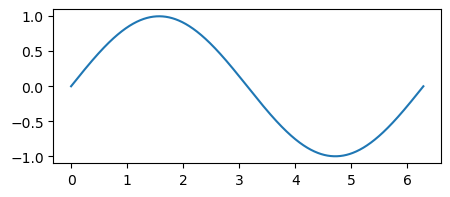

In [237]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 2))
plt.plot(x,y)
plt.show()

In [238]:
np.linspace(0, 2, 20).reshape(2, 10)

array([[0.        , 0.10526316, 0.21052632, 0.31578947, 0.42105263,
        0.52631579, 0.63157895, 0.73684211, 0.84210526, 0.94736842],
       [1.05263158, 1.15789474, 1.26315789, 1.36842105, 1.47368421,
        1.57894737, 1.68421053, 1.78947368, 1.89473684, 2.        ]])

In [239]:
np.arange(10, 30, 3, dtype=np.int8)

array([10, 13, 16, 19, 22, 25, 28], dtype=int8)

## 2.5 배열의 차원 변경하기
- reshape([면수], 행수, 열수) : -1이 올 수 있다.
- resize([면수], 행수, 열수) : -1 불가
- T : 전치 행렬로 변환
- transpose() : 전치행렬로 변환
※ 실행결과가 출력되면 배열이 수정되지 않고, 실행결과가 없으면 배열 수정됨

In [4]:
a = np.random.random( (2, 3))
a

array([[0.06487974, 0.64918223, 0.92802083],
       [0.79014382, 0.02390589, 0.60172657]])

In [5]:
a = np.round(a * 10) # round : 반올림 / floor : 내림 / ceil : 올림
a

array([[1., 6., 9.],
       [8., 0., 6.]])

In [6]:
a.reshape(3, 2)
a

array([[1., 6., 9.],
       [8., 0., 6.]])

In [7]:
a.reshape(-1, 3) # -1이 주어지면 해당 차원의 크기가 자동 계산

array([[1., 6., 9.],
       [8., 0., 6.]])

In [8]:
a.resize( (2,3) ) # 결과 출력하지 않는 함수는 배열 자체를 바꿈. -1 불가
a

array([[1., 6., 9.],
       [8., 0., 6.]])

In [9]:
a.ravel(), a.flatten()

(array([1., 6., 9., 8., 0., 6.]), array([1., 6., 9., 8., 0., 6.]))

In [10]:
a.T # 전치행령(행과 열이 바뀌는 행렬)

array([[1., 8.],
       [6., 0.],
       [9., 6.]])

In [11]:
a.transpose() # 전치행렬

array([[1., 8.],
       [6., 0.],
       [9., 6.]])

## 2.6 배열 인쇄

In [14]:
# 배열이 커서 출력이 안될 경우
np.arange(1001)

array([   0,    1,    2, ...,  998,  999, 1000])

In [19]:
np.arange(10000).reshape(100, 100)

array([[   0,    1,    2, ...,   97,   98,   99],
       [ 100,  101,  102, ...,  197,  198,  199],
       [ 200,  201,  202, ...,  297,  298,  299],
       ...,
       [9700, 9701, 9702, ..., 9797, 9798, 9799],
       [9800, 9801, 9802, ..., 9897, 9898, 9899],
       [9900, 9901, 9902, ..., 9997, 9998, 9999]])

In [25]:
# 배열 출력 옵션 변경(인쇄할 사이즈를 10000, 최대치, 무한대)
import sys # 최대치 : sys.maxsize
# np.set_printoptions(threshold=10000)
# np.set_printoptions(threshold=sys.maxsize)
# np.set_printoptions(threshold=np.inf)
# 커널 재시작시 trhreshold 값 복귀

In [27]:
np.arange(10001)

array([    0,     1,     2,     3,     4,     5,     6,     7,     8,
           9,    10,    11,    12,    13,    14,    15,    16,    17,
          18,    19,    20,    21,    22,    23,    24,    25,    26,
          27,    28,    29,    30,    31,    32,    33,    34,    35,
          36,    37,    38,    39,    40,    41,    42,    43,    44,
          45,    46,    47,    48,    49,    50,    51,    52,    53,
          54,    55,    56,    57,    58,    59,    60,    61,    62,
          63,    64,    65,    66,    67,    68,    69,    70,    71,
          72,    73,    74,    75,    76,    77,    78,    79,    80,
          81,    82,    83,    84,    85,    86,    87,    88,    89,
          90,    91,    92,    93,    94,    95,    96,    97,    98,
          99,   100,   101,   102,   103,   104,   105,   106,   107,
         108,   109,   110,   111,   112,   113,   114,   115,   116,
         117,   118,   119,   120,   121,   122,   123,   124,   125,
         126,   127,

## 2.7 기본 연산 동작
### 1) 배열의요소별 연산

In [56]:
a = np.array([10, 20, 30, 40], dtype=np.int8)
b = np.arange(4)
print(a, a.dtype)
print(b, b.dtype)

[10 20 30 40] int8
[0 1 2 3] int32


In [57]:
c = a + b
print(c, c.dtype)

[10 21 32 43] int32


In [58]:
a += b
a

array([10, 21, 32, 43], dtype=int8)

In [59]:
a = a + b
a, a.dtype

(array([10, 22, 34, 46]), dtype('int32'))

In [60]:
a ** b # 제곱연산 a의 b제곱

array([    1,    22,  1156, 97336])

In [63]:
a < 30

array([ True,  True, False, False])

In [65]:
a[ a < 30 ] # True 인 경우의 값만 return

array([10, 22])

In [67]:
print(a)
print(b)
a * b

[10 22 34 46]
[0 1 2 3]


array([  0,  22,  68, 138])

### 2) 행렬(2차원 배열)의 곱(@, dot함수)
cf *(요소별 곱)

In [69]:
a = np.array([[1,2],
            [0,1]])
b = np.array([[2,0],
             [3,4]])
a,b

(array([[1, 2],
        [0, 1]]),
 array([[2, 0],
        [3, 4]]))

In [71]:
a * b

array([[2, 0],
       [0, 4]])

In [72]:
a @ b # 행렬 곱. 1 2   @   2 0   ->   1*2 + 2*0, 1*0 + 2*4 = [8,8]
      #         0 1       3 4   ->   0*2 + 1*3, 0*0 + 1*4 = [3,4]  

array([[8, 8],
       [3, 4]])

In [89]:
# n행 n열의 단위행렬 : np.eye(n) : A@단위행렬=A
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

### 3) 복합 대입연산자 사용
- 배열에서는 a = a+b 와 a+=b 다소 다르게 작동

In [73]:
a = np.ones( (2, 3), dtype=int ) # 2행3열 int32 배열
a

array([[1, 1, 1],
       [1, 1, 1]])

In [74]:
b = np.random.random( (2, 3) ) # 2행3열 float64 배열
b

array([[0.24048830609445737, 0.5105387331195399 , 0.8032980258114085 ],
       [0.4468957694262079 , 0.6135349219590995 , 0.08037547540144285]])

In [76]:
a += b # a+b를 기존 a에 넣는다

UFuncTypeError: Cannot cast ufunc 'add' output from dtype('float64') to dtype('int32') with casting rule 'same_kind'

In [77]:
b += a
b

array([[1.2404883060944574, 1.51053873311954  , 1.8032980258114084],
       [1.446895769426208 , 1.6135349219590995, 1.0803754754014427]])

In [78]:
a = a+b # a+b를 새로운 변수 a 할당
a

array([[2.2404883060944574, 2.5105387331195397, 2.8032980258114084],
       [2.4468957694262077, 2.6135349219590998, 2.0803754754014427]])

### 4) 배열 요소별 집계
- sum, min, max, mean, var(분산), std(표준편차)

In [85]:
a = np.array([[2, 2, 2, 3], 
            [4, 3, 2, 1]])
a

array([[2, 2, 2, 3],
       [4, 3, 2, 1]])

In [86]:
print('전체합 : ', np.sum(a), a.sum())
print('전체최소 : ', np.min(a), a.min())
print('전체최대 : ', np.max(a), a.max())
print('전체평균 : ', np.mean(a), a.mean())
print('전체분산 : ', np.var(a), a.var())
print('전체표준편차 : ', np.std(a), a.std())

전체합 :  19 19
전체최소 :  1 1
전체최대 :  4 4
전체평균 :  2.375 2.375
전체분산 :  0.734375 0.734375
전체표준편차 :  0.8569568250501305 0.8569568250501305


### 5) 배열 축별 집계
- sum, min, max, mean, var(분산), std(표준편차), argmax(최대값의 인덱스)

In [42]:
a = np.array([[2,2,2,3], [4,3,2,1]])

In [43]:
# axis = 1 : 0축 고정으로 1축들의 합.  3차원(면, 행, 렬)
print('a의 행별 합 :', a.sum(axis=1), np.sum(a, axis=1))

a의 행별 합 : [ 9 10] [ 9 10]


In [44]:
# axis = 0 : 1축을 고정으로 0축(행)의 합
print('a의 열별 합 :', a.sum(axis=0), np.sum(a, axis=0))

a의 열별 합 : [6 5 4 4] [6 5 4 4]


In [107]:
print('a의 행별 최대값 위치 :', a.argmax(axis=1), np.argmax(a, axis=1))

a의 행별 최대값 위치 : [3 0] [3 0]


In [45]:
# 3차원 배열의 축별 집계
b = np.arange(24).reshape(2, 3, 4) # 2면 3행 4열
b, b.ndim

(array([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],
 
        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]]),
 3)

In [46]:
# axis = 0 : 1축과 2축 고정하고 0축(0면, 1면)들의 합
b.sum(axis=0), np.sum(b, axis=0)

(array([[12, 14, 16, 18],
        [20, 22, 24, 26],
        [28, 30, 32, 34]]),
 array([[12, 14, 16, 18],
        [20, 22, 24, 26],
        [28, 30, 32, 34]]))

In [48]:
b.sum(axis=1)

array([[12, 15, 18, 21],
       [48, 51, 54, 57]])

In [49]:
b.sum(axis=2)

array([[ 6, 22, 38],
       [54, 70, 86]])

## 2.8 그외 요소별 계산하는 범용함수들
- 메모리나 시간을 효율적으로 사용할 수 있음
- np.add(A, B, C) ; C=np.add(A, B); C = A+B
- np.subtract(A, B, C) ; C=np.add(A, B); C = A-B
- np.multiply(A, B, C) ; C=np.multiply(A, B); C = A*B
- np.sqrt(배열) ; 요소별 제곱근 cf. math.sqrt(스칼라값)

In [115]:
%time
a = np.array([1, 2])
b = np.array([3, 4])
c = a + b
c

CPU times: total: 0 ns
Wall time: 0 ns


array([4, 6])

In [120]:
np.add(a, b, c)

array([4, 6])

In [118]:
c = np.add(a, b)
c

array([4, 6])

In [121]:
# np.sqrt(배열 또는 스칼라값) math.sqrt(스칼라)
a, np.sqrt(a), np.sqrt(4)

(array([1, 2]), array([1.                , 1.4142135623730951]), 2.0)

In [122]:
import math
math.sqrt(4)
math.sqrt(a)

TypeError: only size-1 arrays can be converted to Python scalars

## 2.9 브로드 케스팅
- 서로 다른 크기의 배열 간 연산을 수행할 수 있도록 해주는 강력한 기능

In [124]:
# 1차원 배열
a = np.array([1, 2, 3])
b = 10
print(a + b)
print(np.add(a, b))

[11 12 13]
[11 12 13]


In [125]:
# 1차원 배열의 브로드 케스팅
a = np.array([1, 2, 3])
b = np.array([10])
print(a + b)
print(np.add(a, b))

[11 12 13]
[11 12 13]


In [50]:
# 2차원 배열의 브로드 케스팅
a = np.array([[0,0,0],
             [10,10,10],
             [20,20,20],
             [30,30,30]]) # 4행 3열
b = np.array([1, 2, 3]) # 3열
a + b

array([[ 1,  2,  3],
       [11, 12, 13],
       [21, 22, 23],
       [31, 32, 33]])

In [126]:
# 2차원 배열의 브로드 케스팅
a = np.array([[0,0,0],
             [10,10,10],
             [20,20,20],
             [30,30,30]]) # 4행 3열
b = np.array([[1],[2],[3],[4]]) # 4행 1열
a + b

array([[ 1,  1,  1],
       [12, 12, 12],
       [23, 23, 23],
       [34, 34, 34]])

In [127]:
# 2차원 배열의 브로드 케스팅
a = np.array([[0,0,0],
             [10,10,10],
             [20,20,20],
             [30,30,30]]) # 4행 3열
b = np.array([1,2,3,4]) # 4열 -> (축 증가) -> 4행 1열
a + b

ValueError: operands could not be broadcast together with shapes (4,3) (4,) 

In [142]:
b = np.array([1,2,3,4]) # 4열 -> (축 증가) -> 4행 1열
# b_1 = b.reshape(4,1) # 방법1
b_1 = b[:, np.newaxis] # 방법2
# b_1 = np.expand_dims(b, axis=1)
b_1

array([[1],
       [2],
       [3],
       [4]])

In [143]:
a + b[:, np.newaxis]

array([[ 1,  1,  1],
       [12, 12, 12],
       [23, 23, 23],
       [34, 34, 34]])

In [53]:
# a와 b의 모든 쌍의 조합에 대해 계산하고 싶을 때
a = np.array([2, 3, 4, 5])
b = np.array([10, 20, 30, 40])
a + b[:, np.newaxis]

array([[12, 13, 14, 15],
       [22, 23, 24, 25],
       [32, 33, 34, 35],
       [42, 43, 44, 45]])

In [54]:
ax, bx = np.ix_(a, b)
ax + bx

array([[12, 22, 32, 42],
       [13, 23, 33, 43],
       [14, 24, 34, 44],
       [15, 25, 35, 45]])

In [161]:
a[1:3, 1:3]

array([[ 5,  6],
       [ 9, 10]])

In [163]:
# 모든 행의 마지막 열 앞까지 ( 모든 행 = 모든 0축의 경우 ':' 또는 '...' 을 반드시 명시)
a[:, 0:-1], a[..., :-1]

(array([[ 0,  1,  2],
        [ 4,  5,  6],
        [ 8,  9, 10],
        [12, 13, 14],
        [16, 17, 18]]),
 array([[ 0,  1,  2],
        [ 4,  5,  6],
        [ 8,  9, 10],
        [12, 13, 14],
        [16, 17, 18]]))

In [52]:
# 0~1 행까지 모든 열 추출(모든 열(1축)의 경우 생략가능 :, ... 사용 가능)
a[0:2, :], a[:2, ...], a[:2]

(array([[ 0,  0,  0],
        [10, 10, 10]]),
 array([[ 0,  0,  0],
        [10, 10, 10]]),
 array([[ 0,  0,  0],
        [10, 10, 10]]))

In [51]:
# 마지막행의 데이터를 2차원으로 변경 -> 4행 1열
# a[-1:]  # 2차원 배열로 인식됨.
a[-1]
a[-1].reshape(4,1)
a[-1][:, np.newaxis]
np.expand_dims(a[-1], axis=1)

ValueError: cannot reshape array of size 3 into shape (4,1)

## 3.2 두 배열을 합치는 함수
- **vstack( tup) : 아래로 추가하는 방식**
- **hstack( tup) : 옆으로 추가하는 방식**
- **dstack( tup) : 마지막 열을 쌓아 합침(차원증가)**

In [211]:
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])

v = np.vstack( (a,b) )
print('vstack 아래로 합치기', v, v.shape, sep='\n') 

h = np.hstack( (a,b) )
print('hstack 옆으로 합치기', h, h.shape, sep='\n') 

d = np.dstack( (a,b) )
print('dstack 축을 depth로 합치기', d, d.shape, sep='\n') 


vstack 아래로 합치기
[[1 2 3]
 [4 5 6]]
(2, 3)
hstack 옆으로 합치기
[1 2 3 4 5 6]
(6,)
dstack 축을 depth로 합치기
[[[1 4]
  [2 5]
  [3 6]]]
(1, 3, 2)


In [223]:
c = np.arange(24).reshape(2, 3, 4)
a, b = c[0], c[1]
a, b

(array([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]]),
 array([[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]))

In [220]:
v = np.vstack( (a,b) )
print('vstack 아래로 합치기 ', v, v.shape, sep='\n')
h = np.hstack( (a,b) )
print('hstack 옆으로 합치기 ', h, h.shape, sep='\n')
d = np.dstack( (a,b) )
print('dstack 축을 depth로 합치기 ', d, d.shape, sep='\n')

vstack 아래로 합치기 
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]]
(6, 4)
hstack 옆으로 합치기 
[[ 0  1  2  3 12 13 14 15]
 [ 4  5  6  7 16 17 18 19]
 [ 8  9 10 11 20 21 22 23]]
(3, 8)
dstack 축을 depth로 합치기 
[[[ 0 12]
  [ 1 13]
  [ 2 14]
  [ 3 15]]

 [[ 4 16]
  [ 5 17]
  [ 6 18]
  [ 7 19]]

 [[ 8 20]
  [ 9 21]
  [10 22]
  [11 23]]]
(3, 4, 2)


In [221]:
np.concatenate( (a, b), axis = 0)

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23]])

In [222]:
np.concatenate( (a, b), axis = 1 ) # hstack( (a, b) )

array([[ 0,  1,  2,  3, 12, 13, 14, 15],
       [ 4,  5,  6,  7, 16, 17, 18, 19],
       [ 8,  9, 10, 11, 20, 21, 22, 23]])

- **column_stack(tup) : 열단위로 합침**
- **row_stack(tup) : 행단위로 합침 == vstack(tup)**
- **stack(tup, axis=0) : axis 속성에 따라 배열 합침 axis 음수차원 가능**

In [57]:
a = np.array([1,2,3])
b = np.array([4,5,6])
c = np.array([7,8,9])
np.column_stack( (a, b, c))

array([[1, 4, 7],
       [2, 5, 8],
       [3, 6, 9]])

In [58]:
c = np.arange(24).reshape(2, 3, 4)
a, b = c[0], c[1]
a, b

(array([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]]),
 array([[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]))

In [59]:
np.stack( (a,b), axis=0 ) # 0면 a, 1면 b

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [60]:
np.stack( (a,b), axis=1) # 행(1축)끼리 합쳐서 면을 이룸 

array([[[ 0,  1,  2,  3],
        [12, 13, 14, 15]],

       [[ 4,  5,  6,  7],
        [16, 17, 18, 19]],

       [[ 8,  9, 10, 11],
        [20, 21, 22, 23]]])

In [61]:
np.stack( (a,b), axis=-1) # a의 행과 b의 행을 열로 합쳐서 면을 이룸

array([[[ 0, 12],
        [ 1, 13],
        [ 2, 14],
        [ 3, 15]],

       [[ 4, 16],
        [ 5, 17],
        [ 6, 18],
        [ 7, 19]],

       [[ 8, 20],
        [ 9, 21],
        [10, 22],
        [11, 23]]])

## 3.3 r_, c_

In [245]:
a = np.array([1,2,3,4])
b = np.array([5,6,7,8])
c = np.array([9,10,11,12])
np.r_[a,b,c]

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [246]:
np.r_[[a],[b],[c]]

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [247]:
np.c_[a,b,c] # 컬럼 단위로 쌓기

array([[ 1,  5,  9],
       [ 2,  6, 10],
       [ 3,  7, 11],
       [ 4,  8, 12]])

In [249]:
a = [[1,2,3,4], [10,20,30,40], [100,200,300,400]]
b = [[5,6,7,8], [50,60,70,80], [500,600,700,800]]
np.stack( (a,b), axis=-1)

array([[[  1,   5],
        [  2,   6],
        [  3,   7],
        [  4,   8]],

       [[ 10,  50],
        [ 20,  60],
        [ 30,  70],
        [ 40,  80]],

       [[100, 500],
        [200, 600],
        [300, 700],
        [400, 800]]])

## 3.4 배열 분리하는 함수
- **vsplit(ary, 정수나 벡터) : 첫번째 축을 따라 분할**
- **hsplit(ary, 정수나 벡터) : 두번째 축을 따라 분할**
- **dsplit(ary, 정수나 벡터) : depth따라 나눔(3차원 이상에서만 동작)**
    - 정수 n : n개 분리
    - [n] : n번째 index를 기점으로 분리
    - [m, n] : m번째, n번째 인덱스를 기점으로 분리

In [250]:
a = np.arange(12).reshape(3, 4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [257]:
a_vsplit = np.vsplit(a, 3)
a_vsplit

[array([[0, 1, 2, 3]]), array([[4, 5, 6, 7]]), array([[ 8,  9, 10, 11]])]

In [260]:
a_vsplit = np.vsplit(a, [2]) # [2] : 2번 인덱스를 기점으로 분리
a_vsplit

[array([[0, 1, 2, 3],
        [4, 5, 6, 7]]),
 array([[ 8,  9, 10, 11]])]

In [271]:
np.hsplit(a, 2)

[array([[0, 1],
        [4, 5],
        [8, 9]]),
 array([[ 2,  3],
        [ 6,  7],
        [10, 11]])]

In [270]:
np.hsplit(a, [1, 3]) # 분리될 인덱스 기점

[array([[0],
        [4],
        [8]]),
 array([[ 1,  2],
        [ 5,  6],
        [ 9, 10]]),
 array([[ 3],
        [ 7],
        [11]])]

- **split(ary, 개수나 인덱스벡터, axis)**
    - axis = 0 : vsplit() 동일
    - axis = 1 : hsplit() 동일
    - axis = 2 : 3차원 이상에서만 동작 dsplit() 동일
- **array_split(ary, 개수나 인덱스벡터, axis)**
    - split과의 차이점은 나눠지지 않은 정수로도 사용 가능


In [273]:
a = np.arange(20).reshape(2, 10)
a

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19]])

In [274]:
np.split(a, 2, axis=0) # 행분리

[array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]]),
 array([[10, 11, 12, 13, 14, 15, 16, 17, 18, 19]])]

In [275]:
np.split(a, 2, axis=1) # 열분리

[array([[ 0,  1,  2,  3,  4],
        [10, 11, 12, 13, 14]]),
 array([[ 5,  6,  7,  8,  9],
        [15, 16, 17, 18, 19]])]

In [279]:
# np.split(a, 3, axis=1) # 열분리
np.array_split(a, 3, axis=1)

[array([[ 0,  1,  2],
        [10, 11, 12]]),
 array([[ 3,  4,  5],
        [13, 14, 15]]),
 array([[ 6,  7],
        [16, 17]]),
 array([[ 8,  9],
        [18, 19]])]